# EXPERIMENT 1 

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Step 1: Load the dataset
url = "https://media.geeksforgeeks.org/wp-content/uploads/Wine.csv"
df = pd.read_csv(url)

In [3]:
# Display the first few rows
print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  Customer_Segment  
0   3.92     1065                 1  

In [4]:
# Step 2: Separate features and target
X = df.drop('Customer_Segment', axis=1)  # features
y = df['Customer_Segment']               # target column

In [6]:
print(X,y)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0          3.06               

In [7]:
# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 4: Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for easy visualization
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Step 5: Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Wine_Type'] = y

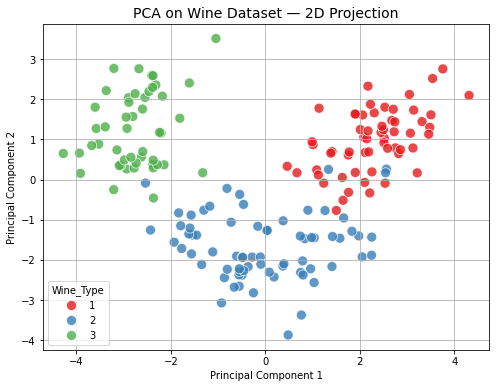

In [10]:
# Step 6: Visualize the results
plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Wine_Type', palette='Set1', s=100, alpha=0.8)
plt.title('PCA on Wine Dataset — 2D Projection', fontsize=14)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

In [11]:
# Step 7: Explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print("Total Variance Captured:", np.sum(pca.explained_variance_ratio_))

Explained Variance Ratio: [0.36198848 0.1920749 ]
Total Variance Captured: 0.5540633835693527
